In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
import time
np.random.seed(12)
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_zillow_weekly= pd.read_excel('Zillow_Weekly_MedianSalesPrice_Raw.xlsx')

In [3]:
df_ny = df_zillow_weekly[df_zillow_weekly.RegionName == 'New York, NY'].melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name = 'MedianSalesPrice')[['MedianSalesPrice', 'Date']]
df_sf = df_zillow_weekly[df_zillow_weekly.RegionName == 'San Francisco, CA'].melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name = 'MedianSalesPrice')[['MedianSalesPrice', 'Date']]
df_den = df_zillow_weekly[df_zillow_weekly.RegionName == 'Denver, CO'].melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name = 'MedianSalesPrice')[['MedianSalesPrice', 'Date']]
df_seat = df_zillow_weekly[df_zillow_weekly.RegionName == 'Seattle, WA'].melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name = 'MedianSalesPrice')[['MedianSalesPrice', 'Date']]

dfs = [df_ny, df_sf, df_den, df_seat]

In [28]:
df_ny.shape

(514, 1)

In [4]:
from sklearn import preprocessing

In [5]:
for i in range(len(dfs)):
    dfs[i] = dfs[i][1:]
    dfs[i].index = pd.to_datetime(dfs[i]['Date'])
    dfs[i] = dfs[i].drop(['Date'], axis = 1).dropna()
    
    dates = dfs[i].index
    columns = dfs[i].columns
    x = dfs[i].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dfs[i] = pd.DataFrame(x_scaled, columns = columns)
    dfs[i].index = dates

df_ny = dfs[0]
df_sf = dfs[1]
df_den = dfs[2]
df_seat = dfs[3]

In [6]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,WhiteKernel,
                                              ExpSineSquared, DotProduct)
             

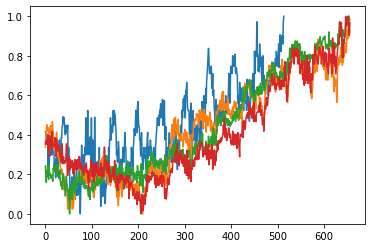

In [7]:
for df in dfs:
    df = df.copy()
    df = df.reset_index()   
    df = df.reset_index()
    df.columns = ['ds','date','y']
    plt.plot(df.ds, df.y,label='San Francisco')

In [82]:
kernel3 = 1.0*RBF(length_scale=1.0, length_scale_bounds=(1e-2, 100.0))+\
1.0*RBF(length_scale=1.0, length_scale_bounds=(1e-2, 100.0))*1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.01, 100.0),
                                periodicity_bounds=(1e-1, 10.0))+\
1.0 * RationalQuadratic(length_scale=4.0, alpha=0.1)

In [44]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer = 200)
gp.fit(x_train.reshape(-1,1), 
       y_train.reshape(-1,1))

GaussianProcessRegressor(kernel=31.6**2 * RBF(length_scale=20) + 54.8**2 * RBF(length_scale=20) * ExpSineSquared(length_scale=1.44, periodicity=2) + 100**2 * DotProduct(sigma_0=2.71) ** 2 + 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957),
                         n_restarts_optimizer=200)

In [45]:
gp.kernel_

0.0585**2 * RBF(length_scale=0.00155) + 0.292**2 * RBF(length_scale=1e+05) * ExpSineSquared(length_scale=2.27, periodicity=51.9) + 0.00316**2 * DotProduct(sigma_0=4.44e-05) ** 2 + 0.0482**2 * RationalQuadratic(alpha=1.76e+03, length_scale=22.9)

In [49]:
mus, sigmas = gp.predict(all_x.values.reshape(-1,1), return_std=True)

In [51]:
print("rmse = {0}".format(np.sqrt(mean_squared_error(mus, true_y))))

rmse = 0.016620072385517416


In [8]:
cities = ['NY','SF','DEN','SEAT']

#counter = 0

counter = 0

ny_data5 = []
sf_data5 = []
den_data5 = []
seat_data5 = []

rmses5 = []
rmses_all5=[]
shifts = 10

for df in dfs:
    df = df.copy()
    df = df.reset_index()   
    df = df.reset_index()
    df.columns = ['ds','date','y']  
    
    #stepwise_model = auto_arima(df, seasonal=True, trace=True,
    #                       suppress_warnings=True,  maxiter=5000, m = 3, stepwise=True)

    #kernel2 = 0.0585**2 * RBF(length_scale=0.00155) + 0.292**2 * RBF(length_scale=1e+05) * ExpSineSquared(length_scale=2.27, periodicity=51.9) + 0.00316**2 * DotProduct(sigma_0=4.44e-05) ** 2 + 0.0482**2 * RationalQuadratic(alpha=1.76e+03, length_scale=22.9)
    kernel5 =0.0663**2 * RBF(length_scale=7.9) + 24.3**2 * RBF(length_scale=100) * 0.00803**2 * ExpSineSquared(length_scale=29.6, periodicity=4.34) + 0.43**2 * RationalQuadratic(alpha=0.00015, length_scale=1e-05)
    gp = gaussian_process.GaussianProcessRegressor(kernel=kernel5)
    for i in range(1, 10): # Training Size
        for j in range(1, 9): # Time Steps
            for shift in range(1, shifts + 1): # Shifts 

                #train = df[len(df)-52*i-j-shift:-j-shift]
                #test = df[-j-shift:-shift]
                x_train = df[len(df)-52*i-j-shift:-j-shift].ds
                y_train = df[len(df)-52*i-j-shift:-j-shift].y
                x_test = df[-j-shift:-shift].ds
                y_test = df[-j-shift:-shift].y

                #stepwise_model.fit(train);

                #test['ARIMA_Predictions'] = stepwise_model.predict(n_periods=len(test));

                #arima_rmse_error = rmse(test['MedianSalesPrice'], test['ARIMA_Predictions'])
                gp.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
                mus,sigma = gp.predict(x_test.values.reshape(-1,1), return_std=True)
                prophet_rmse_error = np.sqrt(mean_squared_error(mus, y_test))
                rmses5.append(prophet_rmse_error)
                
                #rmses.append(arima_rmse_error)

                if counter == 0:
                    if shift == shifts:
                        ny_data5.append(np.array(rmses5).mean())
                        rmses5 = []
                
                if counter == 1:
                    if shift == shifts:
                        sf_data5.append(np.array(rmses5).mean())
                        rmses5 = []
                        
                if counter == 2:
                    if shift == shifts:
                        den_data5.append(np.array(rmses5).mean())
                        rmses5 = []
                        
                if counter == 3:
                    if shift == shifts:
                        seat_data5.append(np.array(rmses5).mean())
                        rmses5 = []
            #rmses_all.append(prophet_rmse_error)
            print(f'RMSE Error: {prophet_rmse_error} for {i} years of training and {j} time steps ahead at {cities[counter]}')
            rmses_all5.append(prophet_rmse_error)          
    counter += 1

RMSE Error: 0.06427883646088794 for 1 years of training and 1 time steps ahead at NY
RMSE Error: 0.06354827278924312 for 1 years of training and 2 time steps ahead at NY
RMSE Error: 0.08734213720364681 for 1 years of training and 3 time steps ahead at NY
RMSE Error: 0.07406708343325719 for 1 years of training and 4 time steps ahead at NY
RMSE Error: 0.059437378097659276 for 1 years of training and 5 time steps ahead at NY
RMSE Error: 0.05704939895983708 for 1 years of training and 6 time steps ahead at NY
RMSE Error: 0.06008947176456608 for 1 years of training and 7 time steps ahead at NY
RMSE Error: 0.06110082310452018 for 1 years of training and 8 time steps ahead at NY
RMSE Error: 0.06348769289592937 for 2 years of training and 1 time steps ahead at NY
RMSE Error: 0.05364982568652045 for 2 years of training and 2 time steps ahead at NY
RMSE Error: 0.07990957203998199 for 2 years of training and 3 time steps ahead at NY
RMSE Error: 0.05429393573277361 for 2 years of training and 4 ti

KeyboardInterrupt: 

In [36]:
ny_data5

[0.051821939851955844,
 0.05016295551049449,
 0.057389495877293785,
 0.06134207443654656,
 0.06940928907785109,
 0.07535510741811743,
 0.08254974956666132,
 0.09130688607346424,
 0.0597266373614358,
 0.0594645238458676,
 0.06336207617925736,
 0.06843965915887698,
 0.07414790014497188,
 0.07643176992118904,
 0.08584380435669524,
 0.09044374204934794,
 0.056743254502133446,
 0.05592997577191287,
 0.06156062562105419,
 0.0651890155716662,
 0.069901588463091,
 0.0721801218608494,
 0.07935932457912794,
 0.08389752634703812,
 0.05608970279761265,
 0.05462526790466519,
 0.05769992089022115,
 0.06058710184342676,
 0.06513303078217975,
 0.06679699587804964,
 0.07046691945034823,
 0.07447349339200374,
 0.05266915132336734,
 0.053494701186872474,
 0.057251943473426194,
 0.05965043091453111,
 0.06488467989008624,
 0.06704922971188913,
 0.07159618903725266,
 0.07505083736425919,
 0.057347576086775966,
 0.0524771793699903,
 0.056487830254194724,
 0.059713979938189624,
 0.06467259998400882,
 0.064521

In [9]:
ny_data5_2 = rmses_all5[:72]

In [10]:
index = [1, 2, 3, 4, 5, 6, 7, 8, 9]
columns = ['Time Step = 1', 'Time Step = 2', 
           'Time Step = 3', 'Time Step = 4', 
           'Time Step = 5', 'Time Step = 6', 
           'Time Step = 7', 'Time Step = 8']

ny_data = pd.DataFrame(np.reshape(np.array(ny_data5), (9, 8)), index = index, columns = columns)
#sf_data = pd.DataFrame(np.reshape(np.array(sf_data), (9, 8)), index = index, columns = columns)
#den_data = pd.DataFrame(np.reshape(np.array(den_data), (9, 8)), index = index, columns = columns)
#seat_data = pd.DataFrame(np.reshape(np.array(seat_data), (9, 8)), index = index, columns = columns)

ny_data.index.name = 'Training Size (Years)'
#sf_data.index.name = 'Training Size (Years)'
#den_data.index.name = 'Training Size (Years)'
#seat_data.index.name = 'Training Size (Years)'

In [37]:
ny_data

,Time Step = 1,Time Step = 2,Time Step = 3,Time Step = 4,Time Step = 5,Time Step = 6,Time Step = 7,Time Step = 8
Training Size (Years),,,,,,,,
1,0.051822,0.050163,0.057389,0.061342,0.069409,0.075355,0.082550,0.091307
2,0.059727,0.059465,0.063362,0.068440,0.074148,0.076432,0.085844,0.090444
3,0.056743,0.055930,0.061561,0.065189,0.069902,0.072180,0.079359,0.083898
4,0.056090,0.054625,0.057700,0.060587,0.065133,0.066797,0.070467,0.074473
5,0.052669,0.053495,0.057252,0.059650,0.064885,0.067049,0.071596,0.075051
6,0.057348,0.052477,0.056488,0.059714,0.064673,0.064521,0.070043,0.073753
7,0.054208,0.056646,0.060561,0.065013,0.068241,0.068806,0.072737,0.076611
8,0.051006,0.053512,0.058164,0.060235,0.064902,0.067109,0.072546,0.076630
9,0.055892,0.057449,0.060600,0.061911,0.067166,0.069367,0.074734,0.078696


In [41]:
import seaborn as sns
sns.set_style('darkgrid')

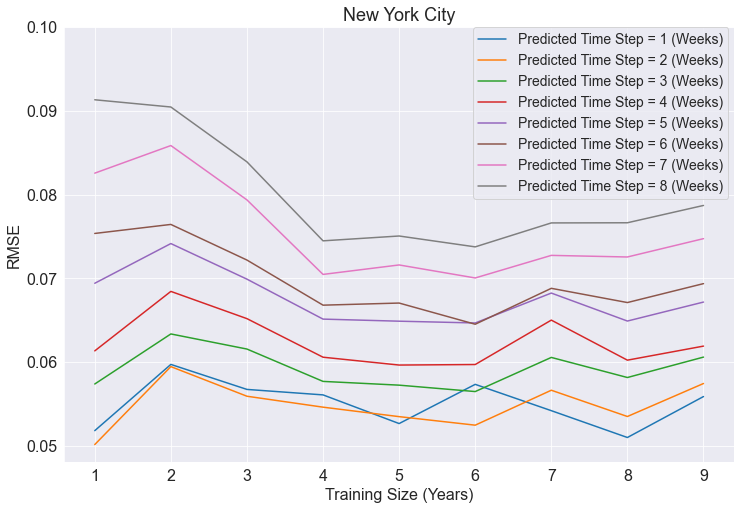

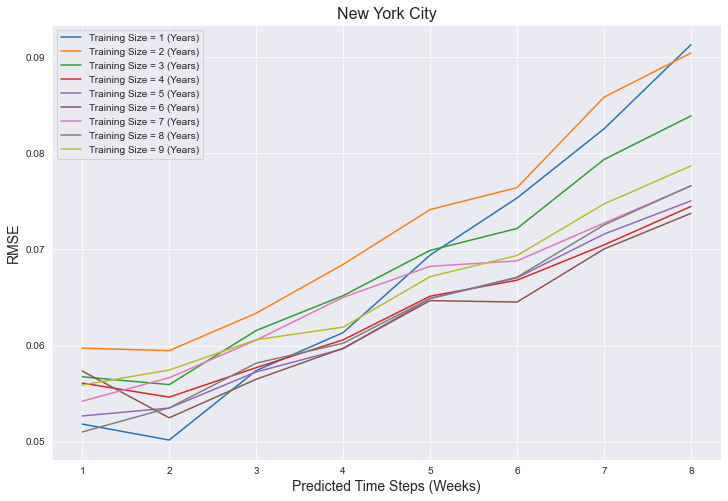

In [35]:
plt.figure(figsize = (12, 8))

for i in range(len(ny_data)-1):
    plt.plot(np.linspace(1, 9, 9), ny_data.T.iloc[i], label = 'Predicted {} (Weeks)'.format(ny_data.columns[i]))
    
plt.title('New York City', fontsize = 18)
plt.xlabel('Training Size (Years)', fontsize = 16);
plt.ylabel('RMSE', fontsize = 16); 
plt.ylim(top = 0.1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(0.61, 1), loc=2, borderaxespad=0., fontsize=14)
plt.savefig('NY-plot')



plt.figure(figsize = (12, 8))

for i in range(len(ny_data)):
    plt.plot(np.linspace(1, 8, 8), ny_data.iloc[i], label = 'Training Size = {} (Years)'.format(ny_data.index[i]))

plt.title('New York City', fontsize = 16)
plt.xlabel('Predicted Time Steps (Weeks)', fontsize = 14);
plt.ylabel('RMSE', fontsize = 14); 
plt.legend();

In [39]:
cities = ['NY','SF','DEN','SEAT']

#counter = 0

counter = 0

ny_data6 = []
sf_data6 = []
den_data6 = []
seat_data6 = []

rmses6 = []
rmses_all6=[]
shifts = 10

for df in dfs:
    df = df.copy()
    df = df.reset_index()   
    df = df.reset_index()
    df.columns = ['ds','date','y']  
    
    #stepwise_model = auto_arima(df, seasonal=True, trace=True,
    #                       suppress_warnings=True,  maxiter=5000, m = 3, stepwise=True)

    #kernel2 = 0.0585**2 * RBF(length_scale=0.00155) + 0.292**2 * RBF(length_scale=1e+05) * ExpSineSquared(length_scale=2.27, periodicity=51.9) + 0.00316**2 * DotProduct(sigma_0=4.44e-05) ** 2 + 0.0482**2 * RationalQuadratic(alpha=1.76e+03, length_scale=22.9)
    kernel6 =0.0663**2 * RBF(length_scale=7.9) + 24.3**2 * RBF(length_scale=100) * 0.00803**2 * ExpSineSquared(length_scale=29.6, periodicity=4.34) + 0.43**2 * RationalQuadratic(alpha=0.00015, length_scale=1e-05)
    gp = gaussian_process.GaussianProcessRegressor(kernel=kernel6)
    for i in range(1, 10): # Training Size
        for j in range(1, 9): # Time Steps
            for shift in range(1, shifts + 1): # Shifts 

                #train = df[len(df)-52*i-j-shift:-j-shift]
                #test = df[-j-shift:-shift]
                x_train = df[len(df)-52*i-j-shift:-j-shift].ds
                y_train = df[len(df)-52*i-j-shift:-j-shift].y
                x_test = df[-j-shift:-shift].ds
                y_test = df[-j-shift:-shift].y

                #stepwise_model.fit(train);

                #test['ARIMA_Predictions'] = stepwise_model.predict(n_periods=len(test));

                #arima_rmse_error = rmse(test['MedianSalesPrice'], test['ARIMA_Predictions'])
                gp.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
                mus,sigma = gp.predict(x_test.values.reshape(-1,1), return_std=True)
                prophet_rmse_error = np.sqrt(mean_squared_error(mus, y_test))
                rmses6.append(prophet_rmse_error)
                

                if counter == 0:
                    if shift == shifts:
                        ny_data6.append(np.array(rmses6).mean())
                        rmses6 = []
                
                if counter == 1:
                    if shift == shifts:
                        sf_data6.append(np.array(rmses6).mean())
                        rmses6 = []
                        
                if counter == 2:
                    if shift == shifts:
                        den_data6.append(np.array(rmses6).mean())
                        rmses6 = []
                        
                if counter == 3:
                    if shift == shifts:
                        seat_data6.append(np.array(rmses6).mean())
                        rmses6 = []
            
            print(f'RMSE Error: {prophet_rmse_error} for {i} years of training and {j} time steps ahead at {cities[counter]}')
            rmses_all6.append(prophet_rmse_error)          
    counter += 1

RMSE Error: 0.06427883646088794 for 1 years of training and 1 time steps ahead at NY
RMSE Error: 0.06354827278924312 for 1 years of training and 2 time steps ahead at NY
RMSE Error: 0.08734213720364681 for 1 years of training and 3 time steps ahead at NY
RMSE Error: 0.07406708343325719 for 1 years of training and 4 time steps ahead at NY
RMSE Error: 0.059437378097659276 for 1 years of training and 5 time steps ahead at NY
RMSE Error: 0.05704939895983708 for 1 years of training and 6 time steps ahead at NY
RMSE Error: 0.06008947176456608 for 1 years of training and 7 time steps ahead at NY
RMSE Error: 0.06110082310452018 for 1 years of training and 8 time steps ahead at NY
RMSE Error: 0.06348769289592937 for 2 years of training and 1 time steps ahead at NY
RMSE Error: 0.05364982568652045 for 2 years of training and 2 time steps ahead at NY
RMSE Error: 0.07990957203998199 for 2 years of training and 3 time steps ahead at NY
RMSE Error: 0.05429393573277361 for 2 years of training and 4 ti

RMSE Error: 0.04107504159310665 for 4 years of training and 2 time steps ahead at SF
RMSE Error: 0.05008683441604998 for 4 years of training and 3 time steps ahead at SF
RMSE Error: 0.08033584552584871 for 4 years of training and 4 time steps ahead at SF
RMSE Error: 0.07083081605102143 for 4 years of training and 5 time steps ahead at SF
RMSE Error: 0.047194125734466984 for 4 years of training and 6 time steps ahead at SF
RMSE Error: 0.04361978805225492 for 4 years of training and 7 time steps ahead at SF
RMSE Error: 0.05932269476926787 for 4 years of training and 8 time steps ahead at SF
RMSE Error: 0.038741666627903015 for 5 years of training and 1 time steps ahead at SF
RMSE Error: 0.05059992089294069 for 5 years of training and 2 time steps ahead at SF
RMSE Error: 0.04599181932094918 for 5 years of training and 3 time steps ahead at SF
RMSE Error: 0.0842405871773013 for 5 years of training and 4 time steps ahead at SF
RMSE Error: 0.07222435416071651 for 5 years of training and 5 ti

RMSE Error: 0.011334313381126266 for 7 years of training and 2 time steps ahead at DEN
RMSE Error: 0.00976075364842731 for 7 years of training and 3 time steps ahead at DEN
RMSE Error: 0.008382748634256705 for 7 years of training and 4 time steps ahead at DEN
RMSE Error: 0.011118938529423084 for 7 years of training and 5 time steps ahead at DEN
RMSE Error: 0.018290595118887136 for 7 years of training and 6 time steps ahead at DEN
RMSE Error: 0.034170989177217385 for 7 years of training and 7 time steps ahead at DEN
RMSE Error: 0.04147112181360536 for 7 years of training and 8 time steps ahead at DEN
RMSE Error: 0.012255643210843492 for 8 years of training and 1 time steps ahead at DEN
RMSE Error: 0.01030155966954419 for 8 years of training and 2 time steps ahead at DEN
RMSE Error: 0.008709665783290604 for 8 years of training and 3 time steps ahead at DEN
RMSE Error: 0.0076704631227606755 for 8 years of training and 4 time steps ahead at DEN
RMSE Error: 0.008954034969414845 for 8 years 

In [40]:
index = [1, 2, 3, 4, 5, 6, 7, 8, 9]
columns = ['Time Step = 1', 'Time Step = 2', 
           'Time Step = 3', 'Time Step = 4', 
           'Time Step = 5', 'Time Step = 6', 
           'Time Step = 7', 'Time Step = 8']

ny_data = pd.DataFrame(np.reshape(np.array(ny_data6), (9, 8)), index = index, columns = columns)
sf_data = pd.DataFrame(np.reshape(np.array(sf_data6), (9, 8)), index = index, columns = columns)
den_data = pd.DataFrame(np.reshape(np.array(den_data6), (9, 8)), index = index, columns = columns)
seat_data = pd.DataFrame(np.reshape(np.array(seat_data6), (9, 8)), index = index, columns = columns)

ny_data.index.name = 'Training Size (Years)'
sf_data.index.name = 'Training Size (Years)'
den_data.index.name = 'Training Size (Years)'
seat_data.index.name = 'Training Size (Years)'

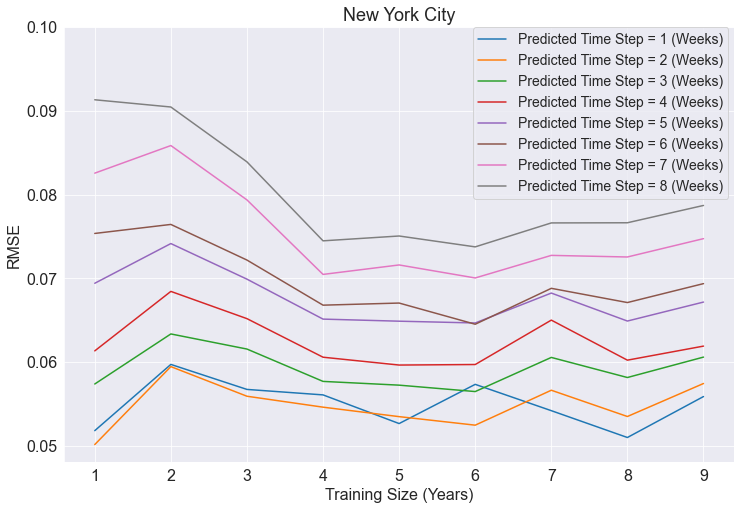

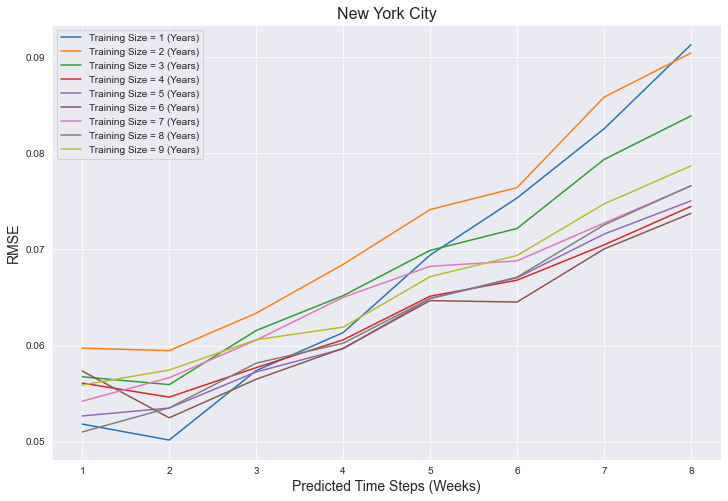

In [42]:
plt.figure(figsize = (12, 8))

for i in range(len(ny_data)-1):
    plt.plot(np.linspace(1, 9, 9), ny_data.T.iloc[i], label = 'Predicted {} (Weeks)'.format(ny_data.columns[i]))
    
plt.title('New York City', fontsize = 18)
plt.xlabel('Training Size (Years)', fontsize = 16);
plt.ylabel('RMSE', fontsize = 16); 
plt.ylim(top = 0.1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(0.61, 1), loc=2, borderaxespad=0., fontsize=14)
plt.savefig('NY-plot')



plt.figure(figsize = (12, 8))

for i in range(len(ny_data)):
    plt.plot(np.linspace(1, 8, 8), ny_data.iloc[i], label = 'Training Size = {} (Years)'.format(ny_data.index[i]))

plt.title('New York City', fontsize = 16)
plt.xlabel('Predicted Time Steps (Weeks)', fontsize = 14);
plt.ylabel('RMSE', fontsize = 14); 
plt.legend();

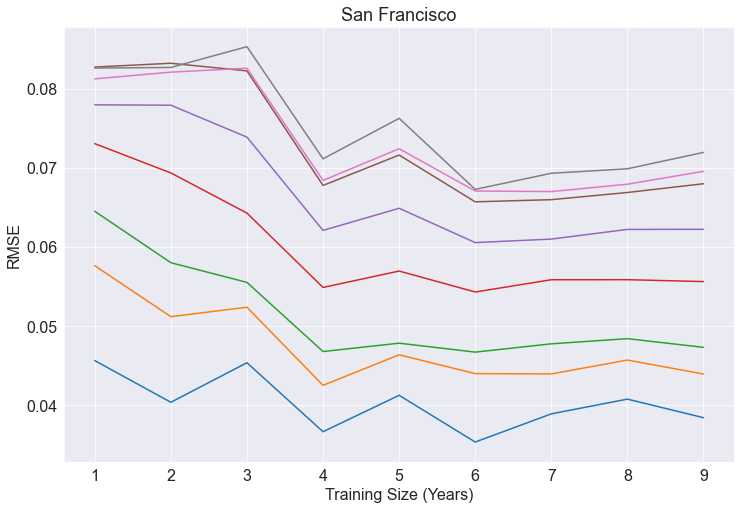

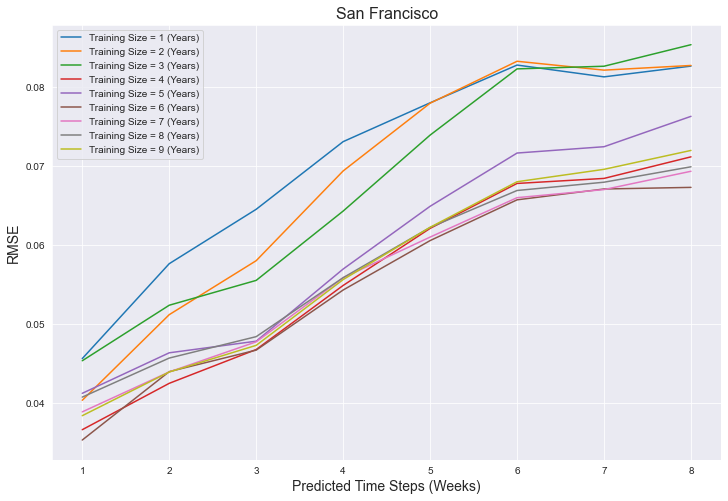

In [43]:
plt.figure(figsize = (12, 8))

for i in range(len(sf_data)-1):
    plt.plot(np.linspace(1, 9, 9), sf_data.T.iloc[i], label = 'Predicted {} (Weeks)'.format(sf_data.columns[i]))
    
plt.title('San Francisco', fontsize = 18)
plt.xlabel('Training Size (Years)', fontsize = 16);
plt.ylabel('RMSE', fontsize = 16); 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('SF-plot')
#plt.legend(bbox_to_anchor=(0.8, 1),loc=2, borderaxespad=0., fontsize=14)



plt.figure(figsize = (12, 8))

for i in range(len(sf_data)):
    plt.plot(np.linspace(1, 8, 8), sf_data.iloc[i], label = 'Training Size = {} (Years)'.format(sf_data.index[i]))

plt.title('San Francisco', fontsize = 16)
plt.xlabel('Predicted Time Steps (Weeks)', fontsize = 14);
plt.ylabel('RMSE', fontsize = 14); 
plt.legend();

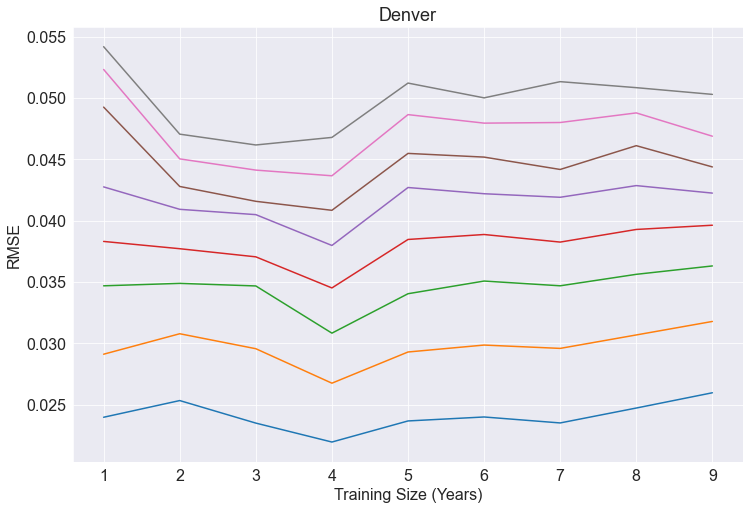

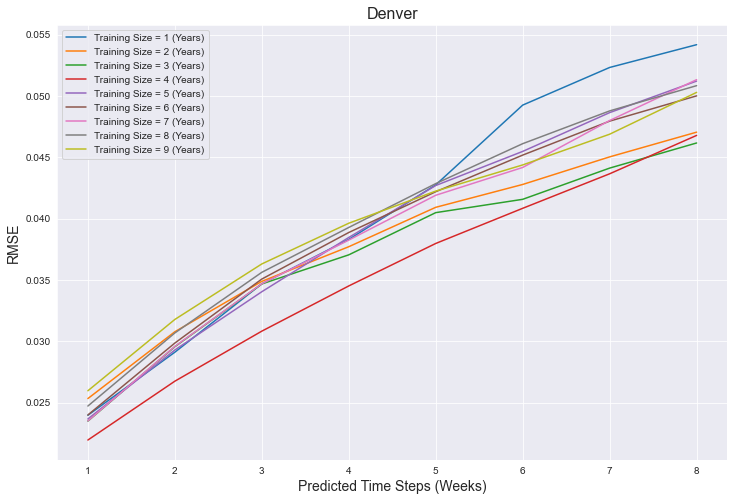

In [44]:
plt.figure(figsize = (12, 8))

for i in range(len(den_data)-1):
    plt.plot(np.linspace(1, 9, 9), den_data.T.iloc[i], label = 'Predicted {} (Weeks)'.format(den_data.columns[i]))
    
plt.title('Denver', fontsize = 18)
plt.xlabel('Training Size (Years)', fontsize = 16);
plt.ylabel('RMSE', fontsize = 16); 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('Den-plot')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)



plt.figure(figsize = (12, 8))

for i in range(len(den_data)):
    plt.plot(np.linspace(1, 8, 8), den_data.iloc[i], label = 'Training Size = {} (Years)'.format(den_data.index[i]))

plt.title('Denver', fontsize = 16)
plt.xlabel('Predicted Time Steps (Weeks)', fontsize = 14);
plt.ylabel('RMSE', fontsize = 14); 
plt.legend();

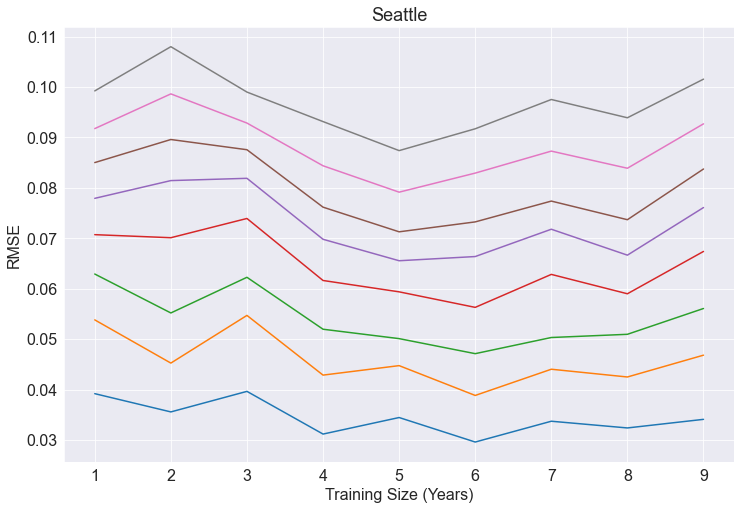

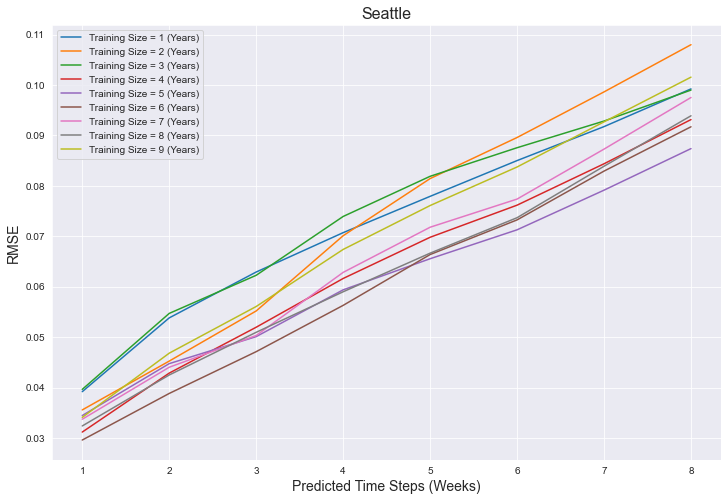

In [45]:
plt.figure(figsize = (12, 8))

for i in range(len(seat_data)-1):
    plt.plot(np.linspace(1, 9, 9), seat_data.T.iloc[i], label = 'Predicted {} (Weeks)'.format(seat_data.columns[i]))
    
plt.title('Seattle', fontsize = 18)
plt.xlabel('Training Size (Years)', fontsize = 16);
plt.ylabel('RMSE', fontsize = 16); 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('seat-plot')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)



plt.figure(figsize = (12, 8))

for i in range(len(seat_data)):
    plt.plot(np.linspace(1, 8, 8), seat_data.iloc[i], label = 'Training Size = {} (Years)'.format(seat_data.index[i]))

plt.title('Seattle', fontsize = 16)
plt.xlabel('Predicted Time Steps (Weeks)', fontsize = 14);
plt.ylabel('RMSE', fontsize = 14); 
plt.legend();